In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, Normalizer, scale
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Load data

In [2]:
df= pd.DataFrame(load_breast_cancer()['data'],
columns=load_breast_cancer()['feature_names'])
y=pd.DataFrame(load_breast_cancer()['target'])
df.shape

(569, 30)

# Reduce dimensionality using PCA

In [3]:
pca = PCA(n_components=5, svd_solver='full')
pca.fit(df)
print(pca.explained_variance_ratio_.sum())
df=pd.DataFrame(pca.transform(df))

0.9999878765363126


# Normalize Data

In [4]:
transformer = Normalizer().fit(df)
df=pd.DataFrame(transformer.transform(df))

# Split data into test and train sets

In [5]:
train, test = train_test_split(pd.concat([df,y],axis=1), test_size=0.33, random_state=42)

# Remove outliners

<AxesSubplot:>

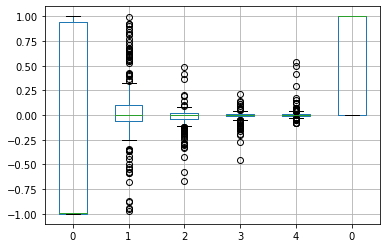

In [6]:
train.boxplot()

In [7]:
Q1=train.quantile(0.25)
Q3=train.quantile(0.75)
IQR=1.5*(Q3-Q1)
train=train[(train >= Q1 -IQR) 
               & (train <= Q3 +IQR)].dropna(axis=0).reset_index(drop=True)

In [8]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

<AxesSubplot:>

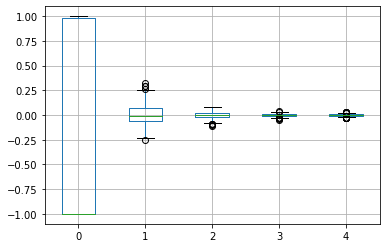

In [9]:
x_train.boxplot()

# Decision tree classifier

In [10]:
import itertools
def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))
params=list(product_dict(**{'criterion':["gini","entropy"],'max_depth':[10,20,50,100],'min_samples_leaf':[10,20,50]}))

In [11]:
for par in params:
    clf = DecisionTreeClassifier(**par)
    clf = clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    ls=clf.get_params()
    print(ls['criterion'],ls['max_depth'],ls['min_samples_leaf']," Accuracy:",metrics.accuracy_score(y_test, y_pred))

gini 10 10  Accuracy: 0.9627659574468085
gini 10 20  Accuracy: 0.9468085106382979
gini 10 50  Accuracy: 0.9468085106382979
gini 20 10  Accuracy: 0.9627659574468085
gini 20 20  Accuracy: 0.9468085106382979
gini 20 50  Accuracy: 0.9468085106382979
gini 50 10  Accuracy: 0.9627659574468085
gini 50 20  Accuracy: 0.9468085106382979
gini 50 50  Accuracy: 0.9468085106382979
gini 100 10  Accuracy: 0.9627659574468085
gini 100 20  Accuracy: 0.9468085106382979
gini 100 50  Accuracy: 0.9468085106382979
entropy 10 10  Accuracy: 0.9627659574468085
entropy 10 20  Accuracy: 0.9468085106382979
entropy 10 50  Accuracy: 0.9468085106382979
entropy 20 10  Accuracy: 0.9627659574468085
entropy 20 20  Accuracy: 0.9468085106382979
entropy 20 50  Accuracy: 0.9468085106382979
entropy 50 10  Accuracy: 0.9627659574468085
entropy 50 20  Accuracy: 0.9468085106382979
entropy 50 50  Accuracy: 0.9468085106382979
entropy 100 10  Accuracy: 0.9627659574468085
entropy 100 20  Accuracy: 0.9468085106382979
entropy 100 50  Acc

# Gradient Booster Classifier

In [12]:
gbc = GradientBoostingClassifier()

In [13]:
gbc.fit(x_train,y_train)
print(classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [14]:
rf_tuned_parameters={"max_depth": [10, 20, 50, 100],
                                     'n_estimators': [50, 100, 200, 500],
                                     'min_samples_leaf': [10, 20, 50],
                                     'learning_rate': [0.1, 0.01]}

In [15]:
from sklearn.model_selection import GridSearchCV
cv_grid = GridSearchCV(gbc, 
                       param_grid = rf_tuned_parameters,
                       scoring = 'roc_auc', verbose = 5)
cv_grid.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV 5/5

[CV 5/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV 1/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=100; total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=100; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_estimators=100; total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=20, min_samples_leaf=20, n_

[CV 4/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.4s
[CV 5/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_estimators=100; total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=50, min_samples_leaf=50, n_

[CV 3/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=10, min_samples_l

[CV 2/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV 4/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV 5/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=10, n_estimators=500; total time=   0.5s
[CV 1/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=20, min_samples_leaf=20, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=20, min_samples_l

[CV 1/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=20, n_estimators=500; total time=   0.5s
[CV 1/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=50, min_samples_leaf=50, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=50, min_samples_

[CV 4/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=200; total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=200; total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=100, min_samples_leaf=50, n_estimators=500; total time=   0.3s


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=5)

In [16]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [17]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	learning_rate: 0.01
	max_depth: 10
	min_samples_leaf: 20
	n_estimators: 500


In [18]:
print(classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [19]:
print(classification_report(y_test,cv_grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        67
           1       0.98      0.95      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.96      0.95       188
weighted avg       0.96      0.96      0.96       188



# Random Forest Classifier

In [20]:
rfc=RandomForestClassifier()

In [21]:
rf_tuned_parameters = {"max_depth": [10,20], 'n_estimators': [50], 'min_samples_leaf': [10]}

In [22]:
cv_grid = GridSearchCV(rfc, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5)
cv_grid.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 1/5] END max_depth=20, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=10, n_estimators=50; total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=10, n_estimators=50; total time=   0.1s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [10],
                         'n_estimators': [50]},
             scoring='roc_auc', verbose=5)

In [23]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	max_depth: 20
	min_samples_leaf: 10
	n_estimators: 50


In [25]:
print(classification_report(y_test,cv_grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [26]:
rfc.fit(x_train,y_train)
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.98      0.94      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.96      0.95       188
weighted avg       0.95      0.95      0.95       188



# KNN Classifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

